<a href="https://colab.research.google.com/github/Christianah-O/Python-Practice/blob/main/EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = '/content/used_cars_data.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head() #checking the first 5 samples of data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Data Understanding

In [ ]:
df.sample(5) #check randomly

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5351,5351,Volkswagen Polo Petrol Highline 1.2L,Pune,2010,79000,Petrol,Manual,Third,16.47 kmpl,1198 CC,73.9 bhp,5.0,NaN,2.44
3825,3825,Renault Scala Diesel RxL,Pune,2016,52126,Diesel,Manual,First,21.64 kmpl,1461 CC,84.8 bhp,5.0,NaN,6.00
1381,1381,Renault Duster 110PS Diesel RxZ AMT,Bangalore,2016,45000,Diesel,Automatic,First,19.6 kmpl,1461 CC,108.45 bhp,5.0,15.05 Lakh,11.50
4098,4098,Maruti SX4 Green Vxi (CNG),Delhi,2012,82069,CNG,Manual,First,21.4 km/kg,1586 CC,103.3 bhp,5.0,NaN,2.65
3517,3517,Mercedes-Benz New C-Class 220 CDI AT,Mumbai,2013,80578,Diesel,Automatic,Second,14.84 kmpl,2143 CC,170 bhp,5.0,NaN,14.50


In [ ]:
#size of data
df.shape

(7253, 14)

In [ ]:
#check info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


there are missing values and there is need to check for them and deal with them.

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
New_Price,6247
Price,1234
Seats,53
Engine,46
Power,46
Mileage,2
Fuel_Type,0
Kilometers_Driven,0
Year,0
Location,0


In [ ]:
#check for duplicate
df.duplicated().sum() #drop duplicate values if there are any

np.int64(0)

In [ ]:
#check for descriptive statistics
df.describe().T #transpose- to switch the rows and columns of the data

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


-There are missing values

we have data types issues(some are object when it is supposed to be int or float)

we have outliers

In [ ]:
df.columns #to check all the columns in the dataset

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

Let's check through every column with missing values and do cleaning if needed.

In [ ]:
#mileage columns
df.Mileage.unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

Mileage column dtype should be float not object

some are in kmpl and some are in km/kg

the unit need to cleaned and the data type should be changed

In [ ]:
#cleaning of unit
df['Mileage'] = df['Mileage'].str.extract(r'(\d+\.\d+)')
df['Mileage']

,Mileage
0,26.6
1,19.67
2,18.2
3,20.77
4,15.2
...,...
7248,20.54
7249,17.21
7250,23.08
7251,17.2


In [ ]:
#to change to float
df['Mileage'] = df['Mileage'].astype(float)
df['Mileage']

,Mileage
0,26.60
1,19.67
2,18.20
3,20.77
4,15.20
...,...
7248,20.54
7249,17.21
7250,23.08
7251,17.20


In [ ]:
#engine column
df.Engine.unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

Engine column units should also be cleaned and dtype should be changed.

In [ ]:
df['Engine'] = df['Engine'].str.replace(' CC', '')
df['Engine']


,Engine
0,998
1,1582
2,1199
3,1248
4,1968
...,...
7248,1598
7249,1197
7250,1461
7251,1197


In [ ]:
#change engine dtype
df['Engine'] = df['Engine'].astype(float)
df['Engine']

,Engine
0,998.0
1,1582.0
2,1199.0
3,1248.0
4,1968.0
...,...
7248,1598.0
7249,1197.0
7250,1461.0
7251,1197.0


In [ ]:
#power column
df.Power.unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [ ]:
#to clean
df['Power'] = df['Power'].str.extract(r'(\d+\.\d+)')
df['Power']

,Power
0,58.16
1,126.2
2,88.7
3,88.76
4,140.8
...,...
7248,103.6
7249,103.6
7250,63.1
7251,103.6


In [ ]:
#change power dtype
df['Power'] = df['Power'].astype(float)
df['Power']

,Power
0,58.16
1,126.20
2,88.70
3,88.76
4,140.80
...,...
7248,103.60
7249,103.60
7250,63.10
7251,103.60


In [ ]:
#new_price column
df.New_Price.unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

The data of above column(New price) is in different currency value, it needs to be converted to either one of it.

In [ ]:
#convert cr to lakh and then clean
#1cr is 100lakh
#creating a conversion function
def convert(value):
  if isinstance(value, str):
    if 'Cr' in value:
      return float(value.replace(' Cr', '')) * 100
    elif 'Lakh' in value:
        return float(value.replace(' Lakh', ''))


In [ ]:
df['New_Price'] = df['New_Price'].apply(convert)

In [ ]:
df['New_Price']

,New_Price
0,NaN
1,NaN
2,8.61
3,NaN
4,NaN
...,...
7248,NaN
7249,NaN
7250,NaN
7251,NaN


In [ ]:
df.New_Price.unique()

array([   nan,   8.61,  21.  ,  10.65,  32.01,  47.87,  10.57,  12.33,
        11.12,  23.64,  18.64,  19.34,  49.14,  11.81,  16.65,   6.67,
         6.45,   6.41,  27.  ,   5.13,  54.43,   9.51,   9.96,  14.44,
         4.53,  95.04,  13.49, 128.  ,  60.88,   7.39,  69.47,   8.78,
        12.74,  10.52,  11.98,   8.54,  33.58,   9.12,   5.29,  44.28,
        20.74,  11.74,  25.52,  14.07,  95.13,   8.34,   8.85,  25.4 ,
        16.67,  79.43,   6.62, 104.  ,  58.67,  28.37,   4.48,  72.64,
        36.15,  44.59,  12.  ,  14.65,  53.72,  33.91,  12.51,   9.74,
        95.38,  60.59,  11.28,  11.48,  11.26,  43.65,  62.07,  86.97,
       100.  ,   4.74,  14.84,  49.49,  48.18,  12.34,  15.38,  19.21,
        22.95,  11.15,  10.32,  28.05,  59.77,  15.86,  19.43,  42.12,
        16.95,  15.45,   7.87,   4.7 ,  15.02,  12.56,  11.33,  26.45,
        10.34,   7.46,  11.85,  10.41,   5.57,  42.48,  16.04,   9.1 ,
         7.65,  13.74,   5.72,  21.33,  78.76,   4.29,  10.04,  11.67,
      

In [ ]:
df.New_Price.dtype

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              4464 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


Feature Engineering

In [ ]:
df.Name

,Name
0,Maruti Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option
2,Honda Jazz V
3,Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic
...,...
7248,Volkswagen Vento Diesel Trendline
7249,Volkswagen Polo GT TSI
7250,Nissan Micra Diesel XV
7251,Volkswagen Polo GT TSI


In [ ]:

#extracting the car's brand and model
df['Brand'] = df['Name'].str.split()
df['Brand']

,Brand
0,"[Maruti, Wagon, R, LXI, CNG]"
1,"[Hyundai, Creta, 1.6, CRDi, SX, Option]"
2,"[Honda, Jazz, V]"
3,"[Maruti, Ertiga, VDI]"
4,"[Audi, A4, New, 2.0, TDI, Multitronic]"
...,...
7248,"[Volkswagen, Vento, Diesel, Trendline]"
7249,"[Volkswagen, Polo, GT, TSI]"
7250,"[Nissan, Micra, Diesel, XV]"
7251,"[Volkswagen, Polo, GT, TSI]"


from the above data, we can see that it has been splitters and become a list.

In [ ]:
#to extract the first name or part ans the brand and saving in another variable
df['Brand'] = df['Brand'].str.get(0) #index o for the first part
df['Brand']


,Brand
0,Maruti
1,Hyundai
2,Honda
3,Maruti
4,Audi
...,...
7248,Volkswagen
7249,Volkswagen
7250,Nissan
7251,Volkswagen


let's go through same process to get the model separately

In [ ]:
df['Model'] = df['Name'].str.split().str.get(1) + ' ' + df['Name'].str.split().str.get(2)
df['Model']

,Model
0,Wagon R
1,Creta 1.6
2,Jazz V
3,Ertiga VDI
4,A4 New
...,...
7248,Vento Diesel
7249,Polo GT
7250,Micra Diesel
7251,Polo GT


In [ ]:
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [ ]:
#to calculate the age of the car
from datetime import date
current_year = date.today().year
current_year


2025

In [ ]:
df['car_age'] = current_year -  df['Year']

We have repetition Isuzu, and there is no brand called Labd, so that needs cleaning.

In [ ]:
#to replace repetition and correct Land brand
list = ['Isuzu', 'ISUZU', 'Land']
df['Brand'] = df['Brand'].replace({
    'ISUZU': 'Isuzu',
    'Land': 'LandRover'
})


In [ ]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'LandRover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'OpelCorsa'], dtype=object)

In [ ]:
df.Model.unique()

array(['Wagon R', 'Creta 1.6', 'Jazz V', 'Ertiga VDI', 'A4 New',
       'EON LPG', 'Micra Diesel', 'Innova Crysta', 'Vento Diesel',
       'Indica Vista', 'Ciaz Zeta', 'City 1.5', 'Swift VDI',
       'Rover Range', 'Rover Freelander', 'Pajero Sport', 'Amaze S',
       'Swift DDiS', 'Duster 85PS', 'New C-Class', '3 Series', 'S Cross',
       'A6 2011-2015', 'i20 1.2', 'Vento Petrol', 'City Corporate',
       'Alto K10', 'WRV i-VTEC', 'Innova 2.5', 'Duster 110PS',
       'Corolla Altis', 'Ssangyong Rexton', 'A6 2.7', 'Vento 1.6',
       'Vitara Brezza', 'KUV 100', 'M-Class ML', 'Polo Diesel',
       'Alto LXi', 'Nano LX', 'i20 Magna', 'Elantra 2.0', 'Elantra CRDi',
       'Xcent 1.1', 'Thar CRDe', 'A4 2.0', 'Swift LDI', 'Swift Ldi',
       'Grand i10', 'Vento 2013-2015', 'KWID RXT', 'i10 Asta',
       'X-Trail SLX', 'Zen Estilo', 'Figo Diesel', 'Indica V2', 'City ZX',
       'C-Class Progressive', 'Ertiga SHVS', 'Creta 1.4',
       'Cayenne 2009-2014', 'XUV500 W8', 'i10 Sportz', 'Terrano

The price columns
price column is the current price the car worth.
New_Price column is the price of the car when it was gotte new.

In [ ]:
#price
df[['Price', 'New_Price']]

,Price,New_Price
0,1.75,NaN
1,12.50,NaN
2,4.50,8.61
3,6.00,NaN
4,17.74,NaN
...,...,...
7248,NaN,NaN
7249,NaN,NaN
7250,NaN,NaN
7251,NaN,NaN


There are missing values in price, so we need to replace anywhere with nan in price with the value in New_price; wherever there is nan in price but there is a value in new_price, price takes the value instead.

In [ ]:
a#to replace price values with new_price values
df['Price'] = np.where(df['Price'].isna(), df['New_Price'], df['Price'])
  ##go to price column, if it is empty, fill with new_pruce but if it's not empty, leave it as price value

In [ ]:
df.sample(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,car_age
970,Hyderabad,2012,96000,Diesel,Manual,First,21.10,1248.0,73.90,5.0,3.60,Maruti,Ritz VDi,13
6287,Delhi,2012,67000,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Audi,A4 New,13
778,Bangalore,2015,76927,Diesel,Automatic,First,15.73,1968.0,174.33,5.0,22.75,Audi,Q3 2012-2015,10


In [ ]:
#drop unnecesarry columns
df.drop(columns = ['S.No.', 'Name', 'New_Price'], inplace=True)


In [ ]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New


# Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   float64
 7   Engine             7207 non-null   float64
 8   Power              4464 non-null   float64
 9   Seats              7200 non-null   float64
 10  Price              6201 non-null   float64
 11  Brand              7253 non-null   object 
 12  Model              7252 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


In [ ]:
#separating into numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include = ['object']).columns.tolist()

In [ ]:
num_cols

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'car_age']

In [ ]:
cat_cols

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']

Distribution of num_col_ is to show if the values are skewed or normal.
using histogram and seaborn library

Normal Distribution- a bell curved shape distrubtion and the tail are almost equal or equal.

Skewed Distribution- the tail are either longer to the rigjt or left side

R-Skewed- right skewed, the tail is skewed to the right.(Right skewed)


L-Skewed- Left skewed, the tail is skewed to the left( Negative skewed)

<Axes: xlabel='Engine', ylabel='Count'>

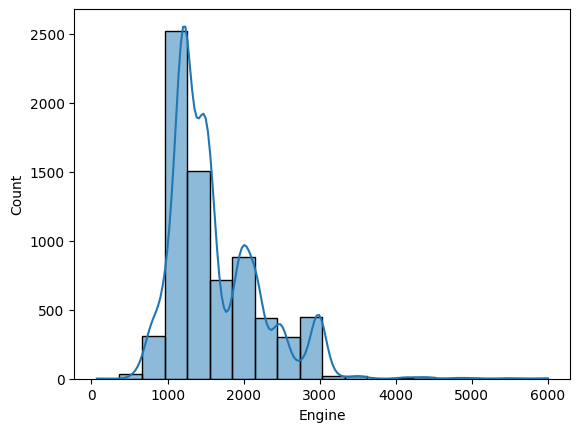

In [ ]:
sns.histplot(df['Engine'], bins=20, kde=True)
#bins for how many bars you want to see

<Axes: ylabel='Engine'>

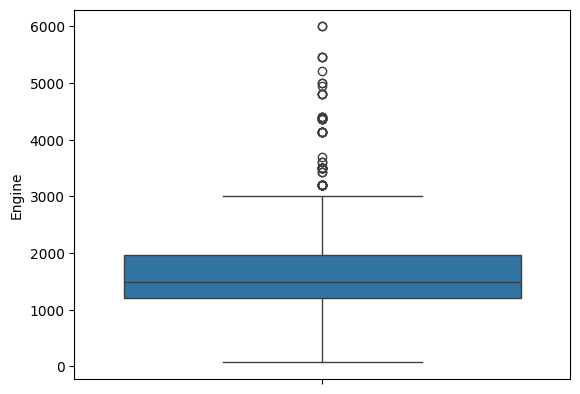

In [ ]:
#check boxplot
sns.boxplot(df['Engine'])

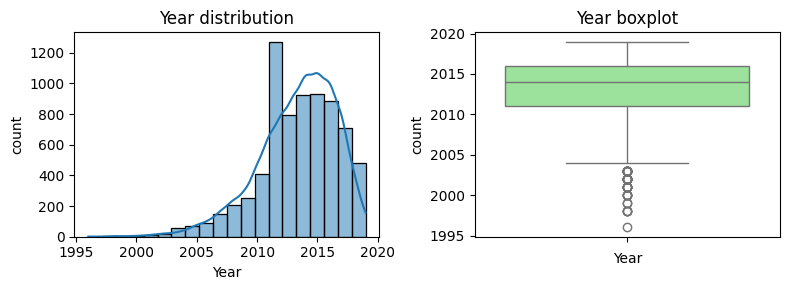

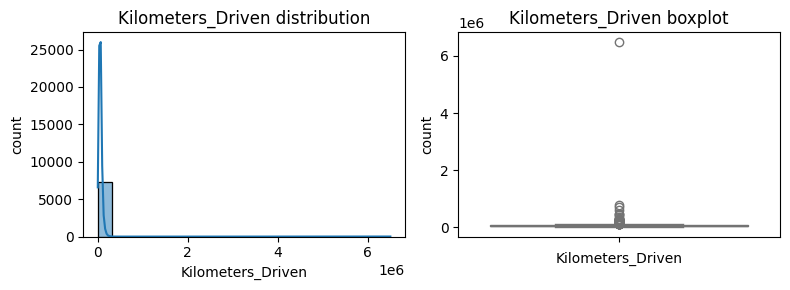

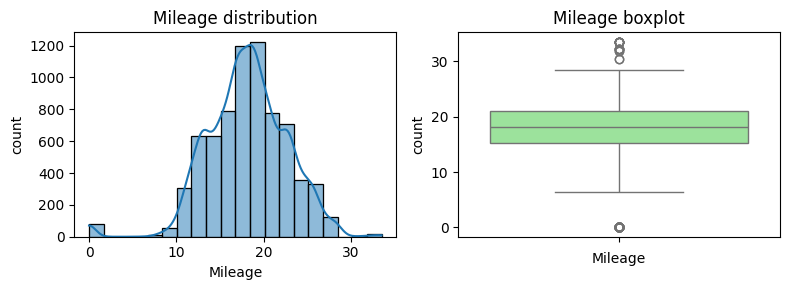

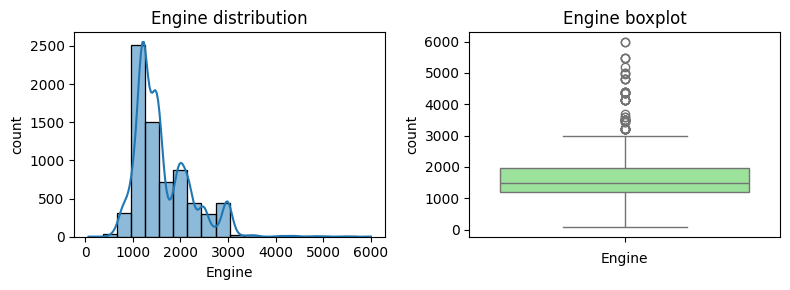

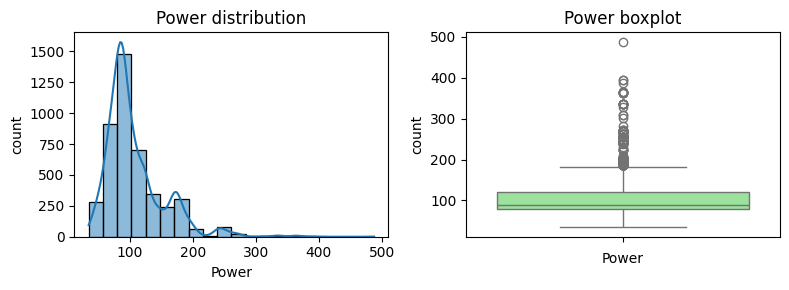

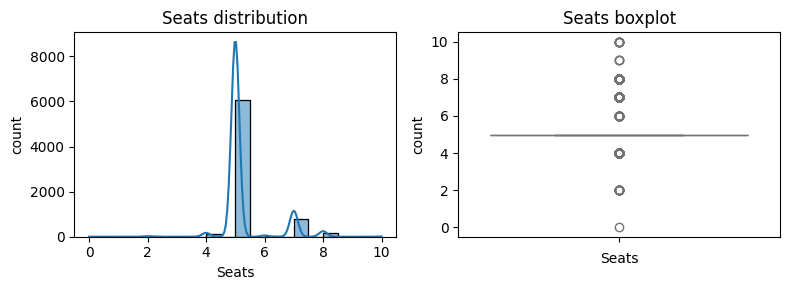

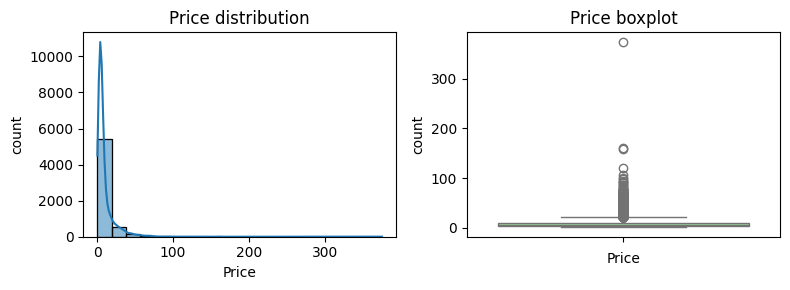

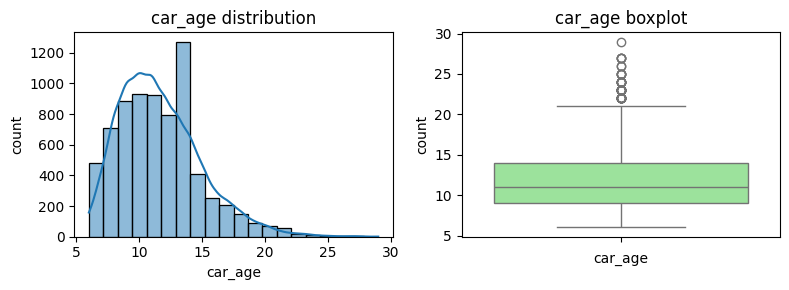

In [ ]:
#to visualize all num_cols using both histogram and boxplot
#for_loop through num_cols
for col in num_cols:
  plt.figure(figsize=(8,3))
  #plot histogram
  plt.subplot(1, 2, 1)
  sns.histplot(df[col], kde=True, bins=20)
  plt.title(f'{col} distribution')
  plt.xlabel(col)
  plt.ylabel('count')

  #plot boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(df[col], color='lightgreen')
  plt.title(f'{col} boxplot')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.tight_layout()
  plt.show()














In [ ]:
##Correlation Matrix
corr_matrix = df[num_cols].corr()
corr_matrix

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,car_age
Year,1.000000,-0.187859,0.322463,-0.054693,0.018554,0.008216,0.273104,-1.000000
Kilometers_Driven,-0.187859,1.000000,-0.069122,0.094818,0.037657,0.090221,-0.016298,0.187859
Mileage,0.322463,-0.069122,1.000000,-0.593569,-0.601432,-0.310632,-0.282280,-0.322463
Engine,-0.054693,0.094818,-0.593569,1.000000,0.879951,0.399262,0.626519,0.054693
Power,0.018554,0.037657,-0.601432,0.879951,1.000000,0.181943,0.763104,-0.018554
Seats,0.008216,0.090221,-0.310632,0.399262,0.181943,1.000000,0.040245,-0.008216
Price,0.273104,-0.016298,-0.282280,0.626519,0.763104,0.040245,1.000000,-0.273104
car_age,-1.000000,0.187859,-0.322463,0.054693,-0.018554,-0.008216,-0.273104,1.000000


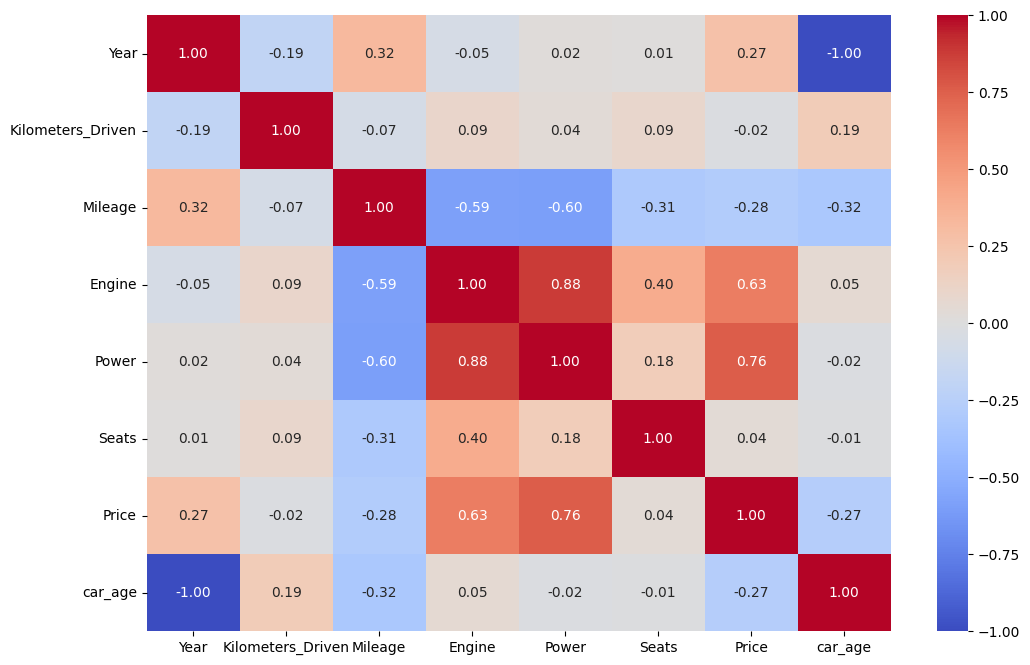

In [ ]:
#to visualuze--- use heatmap for corr_matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()